In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

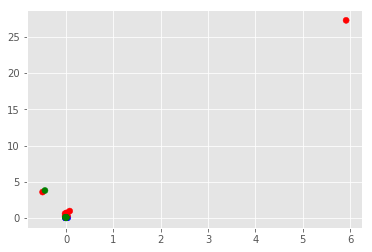

In [4]:
X= np.matrix([[0.0356,0.0371,-0.045,2.2347,0.0514,0.1215,-0.0446,0.0768,467,16.5166,16.0166,0.8036,2.5234,0.5698,0.8148,0.8808,36.5625,0.2097,0.0424,0.2108], 
              [-0.0021,0.0283,-0.0142,3.2091,0.0284,0.0857,-0.09,0.2104,308,20.1832,15.1861,0.6631,2.3379,0.6559,0.1365,0.948,39.375,0.2622,0.0234,1.5234],
              [-0.0002,0.0234,0.0465,3.1466,0.0234,0.09,-0.0498,0.2412,283 ,0,14.4166,0.414,2.2312,0.6594,0.1673,0.9544,38.5547,0.2914,0.0193,1.6623], 
              [-0.0061,0.0276,0.0994,3.5567,0.0282,0.0927,-0.0822,0.1613,158,20.6454,14.9445,0.5036,2.2543,0.6437,0.1485,0.9453,39.0234,0.2729,0.0232,1.6489], 
              [0.0127,0.0243,0.0696,3.2796,0.0274,0.0883,-0.0516,0.1674,395,20.3058,14.9819,0.4316,2.2143,0.6247,0.3751,0.9385,37.6172,0.2718,0.0225,0.9887], 
              [-0.0017,0.0227,0.2086,3.035,0.0228,0.0682,-0.0402,0.1413,136,0,14.8222,0.4941,2.2527,0.6718,0.1936,0.9531,39.2578,0.2782,0.0188,1.5316],
              [-0.0187,0.0279,0.0031,2.439,0.0335,0.0586,-0.0752,0.106,116,19.3422,15.3414,0.5152,2.2423,0.623,0.7171,0.924,37.6172,0.256,0.0276,0.6548], 
              [0.0089,0.0248,-0.0653,2.814,0.0264,0.0586,-0.0621,0.1813,435,19.6101,15.4028,0.5387,2.2646,0.6486,0.2494,0.9392,37.3828,0.2568,0.0217,1.0422], 
              [-0.0137,0.0255,0.1659,3.0022,0.029,0.0638,-0.0761,0.1951,169,20.3733,15.0545,0.4264,2.2102,0.649,0.4336,0.9402,37.8516,0.2714,0.0239,0.9151],
              [-0.021742057,0.605101457,-3.804788763,27.77397598,0.605027314,2.176664535,-4.558904104,0.13671275,372,16.3924955,16.06751154,1.085650571,2.966126641,0.590528588,0.052557509,0.918928143,37.8515625,0.205469734,0.498229983,0.609549678],
              [0.010282786,0.709098001,-5.14599615,39.00598309,0.708627779,1.586293185,-5.885657251,0.116743472,365,13.46852433,16.08441729,1.424059902,3.817637825,0.528617298,0.041273369,0.885499616,33.046875,0.164399564,0.583543252,0.197254999],
              [0.075831463,0.953444981,-5.235189781,37.3130186,0.955725557,1.823243867,-7.425703972,0.076804916,405,11.65614579,15.78744808,1.750523796,4.817727732,0.41835106,0.042632375,0.85188404,27.1875,0.138540556,0.787024183,0.348452851],
              [-0.496727103,3.57912393,-7.832984259,68.0737643,3.610704682,4.109896859,-35.78608631,0.086021505,330,11.46572593,15.86141587,1.911627407,5.262416326,0.335498787,0.017436804,0.844501011,24.609375,0.132386693,2.973355565,0.223793478],
              [0.006958449,0.211290155,-2.989888139,22.26571516,0.21124245,0.745505916,-1.438131441,0.162826421,315,20.56501264,14.86759971,0.43086903,2.229834542,0.658368896,0.16751149,0.947744589,36.796875,0.27753045,0.173954663,1.908627603],
              [0.028771777,0.297260252,-5.060166334,63.43412581,0.298422079,1.329754909,-3.449452998,0.181259601,405,0,14.57946692,0.379670867,2.219200313,0.688883232,0.14801332,0.957764738,37.96875,0.286871676,0.245745644,1.807272467],
              [-0.021484707,0.273893035,-4.586348313,45.85149529,0.274524595,1.536528534,-2.508179719,0.168970814,324,17.85732683,15.78266388,0.860905949,2.60793097,0.654815182,0.139301133,0.939236149,37.6171875,0.230688555,0.226066462,1.627151277],
              [0.001347093,0.278373102,-6.081533261,67.66428431,0.278162477,1.335198036,-3.098655122,0.150537634,358,18.84958741,15.6345559,0.761753848,2.461535484,0.674565089,0.146763972,0.945440047,38.4375,0.243239103,0.229062198,2.361882587],
              [-0.003641341,0.180041748,0.451301083,18.45466332,0.179940262,1.347542642,-1.028906527,0.202764977,323,0,14.25574514,0.409261691,2.215228518,0.683487531,0.070534693,0.959652732,39.4921875,0.294128971,0.148177828,1.570920218],
              [5.913684247,27.29229711,4.971107529,28.62773203,27.905142,208.8767334,-32.34501651,0.181259601,324,10.31664556,15.4612203,2.071695873,5.958547015,0.290554041,0.132532201,0.816625875,16.9921875,0.118003287,22.97942274,0.019632532],
              [-0.001027798,0.070924936,0.139325449,3.142944958,0.070877893,0.246471859,-0.236710985,0.250384025,392,0,14.35892183,0.379202831,2.22549149,0.682061412,0.133890299,0.957114869,38.4375,0.293357269,0.058366773,1.714832524],
              [0.006416201,0.077615549,0.276086402,3.174688698,0.077820867,0.242182233,-0.199805231,0.213517665,275,21.0331508,14.73126592,0.453157593,2.250499027,0.654895547,0.179814686,0.949417114,37.8515625,0.281550898,0.064084197,1.818336804],
              [-0.00502937,0.108411765,0.224441214,3.868496467,0.108445154,0.388890587,-0.336073802,0.192012289,331,20.86901139,14.9465631,0.550319543,2.278149772,0.640476467,0.151571102,0.947032872,39.2578125,0.272969593,0.08930279,1.589761465],
              [-0.014966549,0.101658972,0.010301167,3.688499772,0.102677502,0.30826426,-0.362695211,0.173579109,306,18.44686782,15.68812607,0.774981125,2.505375651,0.61719489,0.208615242,0.930331901,37.96875,0.239540756,0.084553224,0.910321313],
              [-0.002965746,0.09032148,0.028262615,3.234249989,0.090300797,0.264643684,-0.283162141,0.19969278,356,19.22588578,15.41425557,0.639226473,2.360055688,0.640548436,0.270741797,0.940207372,37.5,0.252982001,0.074361213,1.484450957],
              [-0.447104856,3.793427568,-9.345581504,94.84901805,3.81679065,0.322590421,-45.00144584,0.205837174,362,14.31549049,16.2312634,1.395086163,3.656345657,0.5291746,0.008745315,0.901436002,36.2109375,0.172692235,3.14306395,1.27970501],
              [-0.002198772,0.078805948,0.090451914,3.273549348,0.07877609,0.270847576,-0.220393983,0.247311828,349,0,14.58981127,0.421825876,2.231550073,0.665100708,0.363178779,0.951112877,38.3203125,0.285332658,0.064870806,1.777877755],
              [0.000684494,0.109793145,0.338349942,5.672637672,0.109710921,0.499059138,-0.36482559,0.205837174,385,19.55519092,15.30228795,0.632728019,2.355930147,0.646083781,0.273747982,0.942314531,37.96875,0.257935692,0.090345129,1.240064162],
              [-0.004085018,0.077197217,0.068388615,3.486857902,0.077245993,0.253362932,-0.239538043,0.219662058,413,20.4369857,15.02918074,0.556824727,2.287494871,0.660386906,0.240614394,0.947449724,38.4375,0.269819597,0.063610797,1.519262414],
              [-0.005229845,0.073942523,-0.152061532,2.918809521,0.074070571,0.184743597,-0.242380468,0.230414747,418,0,14.45973899,0.384805186,2.229821816,0.663756832,0.166314805,0.952881847,38.3203125,0.28943795,0.060995889,1.614378253]])
y =  [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3]
colors =['blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red','red','green','green','green','green','green','green','green','green','green','g']
plt.scatter([X[:,0]],[X[:,1]],color =['blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red','red','green','green','green','green','green','green','green','green','green','g']
)
plt.show()

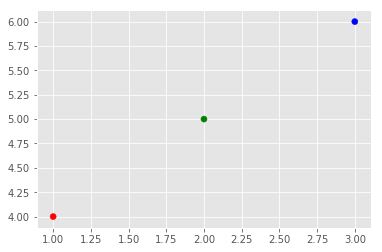

In [5]:
matplotlib.pyplot.scatter([1,2,3],[4,5,6],color=['red','green','blue'])

In [6]:
len(X)

29

In [7]:
y, len(y)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 29)

In [8]:
X

matrix([[ 3.56000000e-02,  3.71000000e-02, -4.50000000e-02,
          2.23470000e+00,  5.14000000e-02,  1.21500000e-01,
         -4.46000000e-02,  7.68000000e-02,  4.67000000e+02,
          1.65166000e+01,  1.60166000e+01,  8.03600000e-01,
          2.52340000e+00,  5.69800000e-01,  8.14800000e-01,
          8.80800000e-01,  3.65625000e+01,  2.09700000e-01,
          4.24000000e-02,  2.10800000e-01],
        [-2.10000000e-03,  2.83000000e-02, -1.42000000e-02,
          3.20910000e+00,  2.84000000e-02,  8.57000000e-02,
         -9.00000000e-02,  2.10400000e-01,  3.08000000e+02,
          2.01832000e+01,  1.51861000e+01,  6.63100000e-01,
          2.33790000e+00,  6.55900000e-01,  1.36500000e-01,
          9.48000000e-01,  3.93750000e+01,  2.62200000e-01,
          2.34000000e-02,  1.52340000e+00],
        [-2.00000000e-04,  2.34000000e-02,  4.65000000e-02,
          3.14660000e+00,  2.34000000e-02,  9.00000000e-02,
         -4.98000000e-02,  2.41200000e-01,  2.83000000e+02,
          0.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)
model = KMeans(n_clusters = 3).fit(X)
y_pred = KMeans(n_clusters = 3).fit_predict(X_test)
assert len(model.cluster_centers_) == 3
assert len(y_pred) == len(y_test)

In [35]:
len(y_train) , len(y_test)

(14, 15)

In [36]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1])

In [37]:
y_test

[1, 3, 3, 2, 2, 3, 3, 3, 1, 2, 1, 2, 3, 2, 1]

In [38]:
adjusted_rand_score(y_pred, y_test)

0.0899711101939744

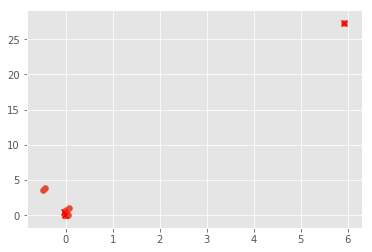

In [14]:
centroids = model.cluster_centers_
plt.scatter([X[:,0]],[X[:,1]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="r")
plt.show()